In [2]:
# ------ Import module ------
import pandas as pd
import numpy as np
import re

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

In [3]:
df=pd.read_csv(r"D:\CU\fall 2021\Practicum\df20k_filled.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,ZIP,TSP: Type of Match (Enhanced),Family composition (Enhanced),Gender code - Person 1,Advantage Individual Marital Status - Person 1,Advantage Individual Marital Status Indicator - Person 1,Person Sequence Number - Person 1,Target Home Market Value 2.0 Indicator,...,sc_wine_and_liquor_19-21m_trans,sc_wine_and_liquor_22-24m_trans,sc_wireless_0-3m_trans,sc_wireless_4-6m_trans,sc_wireless_7-9m_trans,sc_wireless_10-12m_trans,sc_wireless_13-15m_trans,sc_wireless_16-18m_trans,sc_wireless_19-21m_trans,sc_wireless_22-24m_trans
0,0,125663,23608,A,2,1,1,S,33005C38030E0C00582023,S,...,2.000000,1.9644,1.98909,1.000000,1.000000,1.000000,1.978215,1.969719,1.000000,1.905881
1,1,2149,20008,A,2,2,1,S,0B004E28030E0C0002C2A5,S,...,4.000000,4.0000,1.98909,1.982313,2.000000,2.024266,1.978215,1.969719,2.004077,1.905881
2,2,137552,24210,A,1,2,1,S,0C007EBC0313820021AE88,S,...,2.001302,1.9644,1.98909,1.982313,2.014444,1.000000,2.000000,1.969719,2.004077,1.000000
3,3,138638,24293,A,2,1,1,S,33005EE5030E0C0072712F,S,...,2.001302,1.9644,2.00000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.000000
4,4,83357,22151,A,2,2,1,S,33005687030E0C0014EA60,S,...,1.000000,1.9644,2.00000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000


In [4]:
col_to_drop=["Unnamed: 0","Unnamed: 0.1"]
df.drop(col_to_drop, axis=1, inplace=True)

In [5]:
all_columns=df.columns
all_columns=list(all_columns)
all_columns

all_spend=[ i for i in all_columns if re.search(r"spend$", i)]
all_spend

['overall_0-3m_spend',
 'overall_4-6m_spend',
 'overall_7-9m_spend',
 'overall_10-12m_spend',
 'overall_13-15m_spend',
 'overall_16-18m_spend',
 'overall_19-21m_spend',
 'overall_22-24m_spend',
 'c_automotive_0-3m_spend',
 'c_automotive_4-6m_spend',
 'c_automotive_7-9m_spend',
 'c_automotive_10-12m_spend',
 'c_automotive_13-15m_spend',
 'c_automotive_16-18m_spend',
 'c_automotive_19-21m_spend',
 'c_automotive_22-24m_spend',
 'c_communications_service_providers_0-3m_spend',
 'c_communications_service_providers_4-6m_spend',
 'c_communications_service_providers_7-9m_spend',
 'c_communications_service_providers_10-12m_spend',
 'c_communications_service_providers_13-15m_spend',
 'c_communications_service_providers_16-18m_spend',
 'c_communications_service_providers_19-21m_spend',
 'c_communications_service_providers_22-24m_spend',
 'c_education_0-3m_spend',
 'c_education_4-6m_spend',
 'c_education_7-9m_spend',
 'c_education_10-12m_spend',
 'c_education_13-15m_spend',
 'c_education_16-18m_sp

In [6]:
all_trans=[ i for i in all_columns if re.search(r"trans$", i)]
all_trans

['overall_0-3m_trans',
 'overall_4-6m_trans',
 'overall_7-9m_trans',
 'overall_10-12m_trans',
 'overall_13-15m_trans',
 'overall_16-18m_trans',
 'overall_19-21m_trans',
 'overall_22-24m_trans',
 'c_automotive_0-3m_trans',
 'c_automotive_4-6m_trans',
 'c_automotive_7-9m_trans',
 'c_automotive_10-12m_trans',
 'c_automotive_13-15m_trans',
 'c_automotive_16-18m_trans',
 'c_automotive_19-21m_trans',
 'c_automotive_22-24m_trans',
 'c_communications_service_providers_0-3m_trans',
 'c_communications_service_providers_4-6m_trans',
 'c_communications_service_providers_7-9m_trans',
 'c_communications_service_providers_10-12m_trans',
 'c_communications_service_providers_13-15m_trans',
 'c_communications_service_providers_16-18m_trans',
 'c_communications_service_providers_19-21m_trans',
 'c_communications_service_providers_22-24m_trans',
 'c_education_0-3m_trans',
 'c_education_4-6m_trans',
 'c_education_7-9m_trans',
 'c_education_10-12m_trans',
 'c_education_13-15m_trans',
 'c_education_16-18m_tr

In [7]:
num_columns=["Number of Children (Enhanced)","Age in 2-year ranges - Person 1 (Enhanced)",
             "Target Home Market Value 2.0 Code","Advantage Length of Residence","Advantage Household Age (Enhanced)",
             "Advantage Target Income 3.0","Discretionary Spending Income","Target Net Worth 4.0 Code", "NICHES 5.0 Code"]
num_columns.extend(all_spend)
num_columns.extend(all_trans)
print(len(num_columns))

1287


In [8]:
cat_columns=[ i for i in all_columns if i not in num_columns]
print(len(cat_columns))

31


In [9]:
len(all_columns)==len(num_columns)+len(cat_columns)

True

In [10]:
# Dropping subcategories

sc_columns=[i for i in all_columns if re.search(r"^sc_", i)]
len(sc_columns)

1086

In [11]:
indicators_to_drop=[i for i in all_columns if re.search(r".?Indicator.?",i)]
indicators_to_drop

['Advantage Individual Marital Status Indicator - Person 1',
 'Target Home Market Value 2.0 Indicator',
 'NICHES 5.0 Indicator',
 'Advantage Dwelling Type Indicator',
 'Advantage Home Owner Indicator',
 'Advantage Length of Residence Indicator',
 'Advantage Household Age Indicator (Enhanced)',
 'Advantage Presence of Children Indicator (Enhanced)',
 'Advantage Target Income 3.0 Indicator',
 'Target Net Worth 4.0 Indicator']

In [12]:
overall_to_drop=[i for i in all_columns if re.search(r"^overall", i)]
overall_to_drop

['overall_0-3m_spend',
 'overall_4-6m_spend',
 'overall_7-9m_spend',
 'overall_10-12m_spend',
 'overall_13-15m_spend',
 'overall_16-18m_spend',
 'overall_19-21m_spend',
 'overall_22-24m_spend',
 'overall_0-3m_trans',
 'overall_4-6m_trans',
 'overall_7-9m_trans',
 'overall_10-12m_trans',
 'overall_13-15m_trans',
 'overall_16-18m_trans',
 'overall_19-21m_trans',
 'overall_22-24m_trans']

In [13]:
all_columns

['ZIP',
 'TSP: Type of Match (Enhanced)',
 'Family composition (Enhanced)',
 'Gender code - Person 1',
 'Advantage Individual Marital Status - Person 1',
 'Advantage Individual Marital Status Indicator - Person 1',
 'Person Sequence Number - Person 1',
 'Target Home Market Value 2.0 Indicator',
 'NICHES 5.0 Code',
 'NICHES 5.0 Indicator',
 'Advantage Dwelling Type',
 'Advantage Dwelling Type Indicator',
 'Advantage Home Owner',
 'Advantage Home Owner Indicator',
 'Advantage Length of Residence Indicator',
 'Advantage Household Age Indicator (Enhanced)',
 'Advantage Presence of Children (Enhanced)',
 'Advantage Presence of Children Indicator (Enhanced)',
 'Advantage Target Income 3.0 Indicator',
 'Target Net Worth 4.0 Indicator',
 'Household Key',
 ',given_name',
 'middle_initial',
 'surname',
 'contracted_address',
 'city',
 'state',
 'zip',
 'zip_plus4',
 'psn',
 'household_id',
 'file_code',
 'Number of Children (Enhanced)',
 'Age in 2-year ranges - Person 1 (Enhanced)',
 'Target Hom

In [14]:
cols_to_drop=['ZIP',"TSP: Type of Match (Enhanced)","Person Sequence Number - Person 1","Household Key"
            , ",given_name","middle_initial","surname","contracted_address","city","zip","zip_plus4","psn"
            ,"household_id","file_code", "NICHES 5.0 Code"]

cols_to_drop.extend(sc_columns)
cols_to_drop.extend(indicators_to_drop)
cols_to_drop.extend(overall_to_drop)

len(cols_to_drop)

1127

In [15]:
df2=df.drop(cols_to_drop, axis=1)
df2.head()

,Family composition (Enhanced),Gender code - Person 1,Advantage Individual Marital Status - Person 1,Advantage Dwelling Type,Advantage Home Owner,Advantage Presence of Children (Enhanced),state,Number of Children (Enhanced),Age in 2-year ranges - Person 1 (Enhanced),Target Home Market Value 2.0 Code,...,c_services_19-21m_trans,c_services_22-24m_trans,c_travel_0-3m_trans,c_travel_4-6m_trans,c_travel_7-9m_trans,c_travel_10-12m_trans,c_travel_13-15m_trans,c_travel_16-18m_trans,c_travel_19-21m_trans,c_travel_22-24m_trans
0,2,1,1,1,4,0,VA,2.07129,78.0,267,...,4.000000,4.000000,6.0,4.0,5.0,6.0,4.0,5.0,4.0,6.0
1,2,2,1,1,4,0,DC,2.07129,74.0,2991,...,4.000000,4.000000,4.0,6.0,4.0,4.0,3.0,4.0,7.0,5.0
2,1,2,1,1,4,1,VA,1.00000,36.0,630,...,2.484991,2.428028,4.0,3.0,5.0,4.0,2.0,4.0,3.0,5.0
3,2,1,1,1,4,1,VA,2.07129,54.0,137,...,2.484991,2.428028,3.0,2.0,2.0,4.0,1.0,3.0,2.0,3.0
4,2,2,1,1,4,0,VA,2.07129,62.0,686,...,3.000000,2.000000,3.0,4.0,5.0,3.0,4.0,5.0,4.0,6.0


In [15]:
"""
condition_1=[
    (df2["NICHES 5.0 Code"].isin(["A1","A2","A3","A4","A5","A6","A7","A8"])),
    (df2["NICHES 5.0 Code"].isin(["B1"])),
    (df2["NICHES 5.0 Code"].isin(["C1","C2","C3","C4"])),
    (df2["NICHES 5.0 Code"].isin(["D1"])),
    (df2["NICHES 5.0 Code"].isin(["E1",'E2','E3','E4','E5','E6','E7','E8','E9'])),
(df2["NICHES 5.0 Code"].isin(["F1",'F2','F3','F4'])),
(df2["NICHES 5.0 Code"].isin(["G1",'G2','G3','G4'])),
(df2["NICHES 5.0 Code"].isin(["H1",'H2','H3','H4','H5','H6'])),
(df2["NICHES 5.0 Code"].isin(["I1",'I2'])),
(df2["NICHES 5.0 Code"].isin(["J1",'J2','J3','J4','J5','J6'])),
(df2["NICHES 5.0 Code"].isin(["K1",'K2','K3','K4','K5','K6'])),
(df2["NICHES 5.0 Code"].isin(["L1",'L2','L3'])),
(df2["NICHES 5.0 Code"].isin(["M1"])),
(df2["NICHES 5.0 Code"].isin(["N1",'N2','N3'])),
(df2["NICHES 5.0 Code"].isin(["O1",'O2','O3','O4','O5','O6','O7','O8'])),
(df2["NICHES 5.0 Code"].isin(["P1",'P2','P3'])),
(df2["NICHES 5.0 Code"].isin(["Q1",'Q2','Q3','Q4','Q5'])),
(df2["NICHES 5.0 Code"].isin(["R1",'R2','R3','R4','R5'])),
(df2["NICHES 5.0 Code"].isin(["S1",'S2','S3','S4','S5','S6','S7',"S8",'S9','S10'])),
(df2["NICHES 5.0 Code"].isin(["T1",'T2'])),
(df2["NICHES 5.0 Code"].isin(["U1",'U2','U3','U4'])),
(df2["NICHES 5.0 Code"].isin(["V1",'V2'])),
(df2["NICHES 5.0 Code"].isin(["W1",'W2','W3'])),
(df2["NICHES 5.0 Code"].isin(["X1",'X2','X3'])),
(df2["NICHES 5.0 Code"].isin(["Y1",'Y2','Y3'])),
(df2["NICHES 5.0 Code"].isin(["Z1",'Z2']))]
new_lable_1=["A", "B","C","D","E",'F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
df2["NICHES"]=np.select(condition_1,new_lable_1, default=np.nan)
"""

SyntaxError: EOL while scanning string literal (<ipython-input-15-95d5462e87e5>, line 31)

In [16]:
columns_left=df2.columns.to_list()
columns_left

['Family composition (Enhanced)',
 'Gender code - Person 1',
 'Advantage Individual Marital Status - Person 1',
 'Advantage Dwelling Type',
 'Advantage Home Owner',
 'Advantage Presence of Children (Enhanced)',
 'state',
 'Number of Children (Enhanced)',
 'Age in 2-year ranges - Person 1 (Enhanced)',
 'Target Home Market Value 2.0 Code',
 'Advantage Length of Residence',
 'Advantage Household Age (Enhanced)',
 'Advantage Target Income 3.0',
 'Discretionary Spending Income',
 'Target Net Worth 4.0 Code',
 'c_automotive_0-3m_spend',
 'c_automotive_4-6m_spend',
 'c_automotive_7-9m_spend',
 'c_automotive_10-12m_spend',
 'c_automotive_13-15m_spend',
 'c_automotive_16-18m_spend',
 'c_automotive_19-21m_spend',
 'c_automotive_22-24m_spend',
 'c_communications_service_providers_0-3m_spend',
 'c_communications_service_providers_4-6m_spend',
 'c_communications_service_providers_7-9m_spend',
 'c_communications_service_providers_10-12m_spend',
 'c_communications_service_providers_13-15m_spend',
 'c

In [17]:
#c=[i for i in columns_left if re.search(r"^c_", i)]
categories=['Family composition (Enhanced)',
 'Gender code - Person 1',
 'Advantage Dwelling Type',
 'Advantage Home Owner',
 'Advantage Presence of Children (Enhanced)',
 'state', "Advantage Individual Marital Status - Person 1"]


len(categories)

7

In [18]:
all_c=[i for i in all_columns if re.search(r"^c_",i)]
all_c

['c_automotive_0-3m_spend',
 'c_automotive_4-6m_spend',
 'c_automotive_7-9m_spend',
 'c_automotive_10-12m_spend',
 'c_automotive_13-15m_spend',
 'c_automotive_16-18m_spend',
 'c_automotive_19-21m_spend',
 'c_automotive_22-24m_spend',
 'c_communications_service_providers_0-3m_spend',
 'c_communications_service_providers_4-6m_spend',
 'c_communications_service_providers_7-9m_spend',
 'c_communications_service_providers_10-12m_spend',
 'c_communications_service_providers_13-15m_spend',
 'c_communications_service_providers_16-18m_spend',
 'c_communications_service_providers_19-21m_spend',
 'c_communications_service_providers_22-24m_spend',
 'c_education_0-3m_spend',
 'c_education_4-6m_spend',
 'c_education_7-9m_spend',
 'c_education_10-12m_spend',
 'c_education_13-15m_spend',
 'c_education_16-18m_spend',
 'c_education_19-21m_spend',
 'c_education_22-24m_spend',
 'c_entertainment_0-3m_spend',
 'c_entertainment_4-6m_spend',
 'c_entertainment_7-9m_spend',
 'c_entertainment_10-12m_spend',
 'c_

In [19]:
def One_hot_encoding_helper(enco, df, features):
    transformed=pd.DataFrame(enco.transform(df[features]).toarray(), columns=enco.get_feature_names(features))
    return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(features, axis=1)

enc_ohe = OneHotEncoder()
enc_ohe.fit(df2[categories])

df3= One_hot_encoding_helper(enc_ohe ,df2, categories)
df3.head()

,Number of Children (Enhanced),Age in 2-year ranges - Person 1 (Enhanced),Target Home Market Value 2.0 Code,Advantage Length of Residence,Advantage Household Age (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,c_automotive_0-3m_spend,c_automotive_4-6m_spend,...,Advantage Home Owner_2,Advantage Home Owner_3,Advantage Home Owner_4,Advantage Presence of Children (Enhanced)_0,Advantage Presence of Children (Enhanced)_1,state_DC,state_MD,state_VA,Advantage Individual Marital Status - Person 1_1,Advantage Individual Marital Status - Person 1_2
0,2.07129,78.0,267,8,7,7,5,7,13.000000,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.07129,74.0,2991,7,7,13,10,11,9.000000,11.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.00000,36.0,630,2,3,10,8,6,9.352441,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,2.07129,54.0,137,5,4,8,4,1,21.000000,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,2.07129,62.0,686,8,5,12,11,10,18.000000,10.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
df3.drop(all_c, axis=1, inplace=True)

In [21]:
columns_left2=df3.columns.tolist()
columns_left2

['Number of Children (Enhanced)',
 'Age in 2-year ranges - Person 1 (Enhanced)',
 'Target Home Market Value 2.0 Code',
 'Advantage Length of Residence',
 'Advantage Household Age (Enhanced)',
 'Advantage Target Income 3.0',
 'Discretionary Spending Income',
 'Target Net Worth 4.0 Code',
 'Family composition (Enhanced)_1',
 'Family composition (Enhanced)_2',
 'Family composition (Enhanced)_3',
 'Family composition (Enhanced)_4',
 'Family composition (Enhanced)_5',
 'Family composition (Enhanced)_6',
 'Family composition (Enhanced)_7',
 'Family composition (Enhanced)_8',
 'Family composition (Enhanced)_10',
 'Family composition (Enhanced)_11',
 'Family composition (Enhanced)_12',
 'Family composition (Enhanced)_13',
 'Family composition (Enhanced)_14',
 'Family composition (Enhanced)_16',
 'Gender code - Person 1_0',
 'Gender code - Person 1_1',
 'Gender code - Person 1_2',
 'Gender code - Person 1_3',
 'Advantage Dwelling Type_0',
 'Advantage Dwelling Type_1',
 'Advantage Dwelling Type_

In [22]:
def run_kmeans(n_clusters_f, init_f, df_f):
    # Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.
    k_means_model_f = KMeans(n_clusters=n_clusters_f, init=init_f)
    k_means_model_f.fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_

    # summarize cluster attributes
    #k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(np.mean)
    return k_means_model_f, k_means_model_f_summary

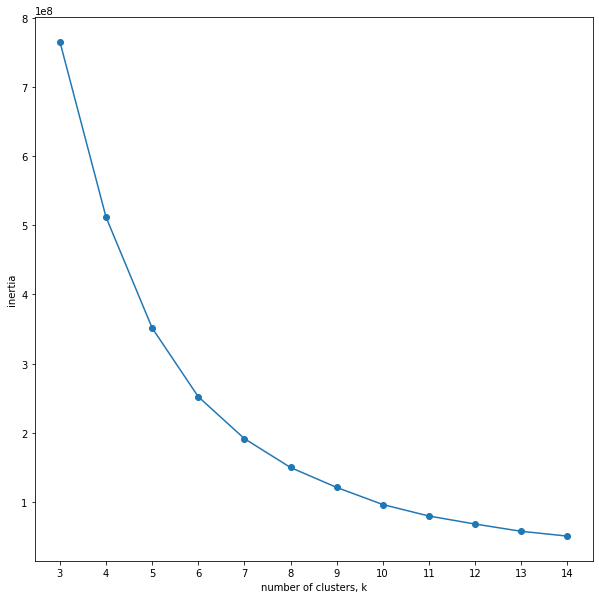

In [23]:
# add the code to run the clustering algorithm for various numbers of clusters
ks = range(3, 15)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df3)
    inertias.append(model.inertia_)

# --- draw elbow plot

# create an elbow plot for your numbers of clusters in previous step
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [26]:
n_clusters = 3
init_point_selection_method = 'k-means++'

In [27]:
cols_for_clustering_full = df3.columns
df_cluster = df3.reindex(columns=cols_for_clustering_full)

model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

In [24]:
n_clusters = 6
init_point_selection_method = 'k-means++'
cols_for_clustering_full = df3.columns
df_cluster = df3.reindex(columns=cols_for_clustering_full)

model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

In [25]:
model

KMeans(n_clusters=6)

In [26]:
model_summary

,Number of Children (Enhanced),Age in 2-year ranges - Person 1 (Enhanced),Target Home Market Value 2.0 Code,Advantage Length of Residence,Advantage Household Age (Enhanced),Advantage Target Income 3.0,Discretionary Spending Income,Target Net Worth 4.0 Code,Family composition (Enhanced)_1,Family composition (Enhanced)_2,...,Advantage Home Owner_2,Advantage Home Owner_3,Advantage Home Owner_4,Advantage Presence of Children (Enhanced)_0,Advantage Presence of Children (Enhanced)_1,state_DC,state_MD,state_VA,Advantage Individual Marital Status - Person 1_1,Advantage Individual Marital Status - Person 1_2
predict_cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,2.043069,52.423100,733.390734,5.614890,4.446438,10.340653,8.304499,7.505088,0.177825,0.342528,...,0.088377,0.083824,0.774237,0.569363,0.430637,0.088913,0.394483,0.516604,0.662292,0.337708
1,2.083572,53.697664,224.314274,5.884319,4.510348,6.064606,3.064606,3.536217,0.115283,0.256036,...,0.087822,0.173786,0.696869,0.643937,0.356063,0.007827,0.381666,0.610507,0.593393,0.406607
2,1.962064,54.403449,2187.272277,5.509901,4.688119,12.099010,10.301980,9.425743,0.227723,0.435644,...,0.019802,0.019802,0.920792,0.480198,0.519802,0.212871,0.287129,0.500000,0.816832,0.183168
3,2.045366,57.818182,6122.363636,6.000000,5.272727,11.636364,9.636364,9.272727,0.363636,0.545455,...,0.000000,0.000000,1.000000,0.454545,0.545455,0.363636,0.363636,0.272727,0.909091,0.090909
4,2.083130,53.136024,444.468121,5.734685,4.492291,8.614947,6.179469,5.928184,0.161550,0.315183,...,0.080289,0.113071,0.763578,0.583831,0.416169,0.032643,0.505626,0.461731,0.650090,0.349910
5,2.033220,53.431960,1171.025076,5.737842,4.642097,11.324468,9.427812,8.633739,0.184650,0.360942,...,0.073708,0.061550,0.825988,0.565350,0.434650,0.170213,0.311550,0.518237,0.689210,0.310790


In [46]:
model_summary.to_csv(r"D:\CU\fall 2021\Practicum\Kmeans_summary_noc.csv")

In [29]:
labels=model.labels_

In [31]:
df["labels"]=labels

In [33]:
df.to_csv(r"D:\CU\fall 2021\Practicum\df20k_labeled.csv")

In [ ]:
['Number of Children (Enhanced)',
 'Age in 2-year ranges - Person 1 (Enhanced)',
 'Target Home Market Value 2.0 Code',
 'Advantage Length of Residence',
 'Advantage Household Age (Enhanced)',
 'Advantage Target Income 3.0',
 'Discretionary Spending Income',
 'Target Net Worth 4.0 Code',
 'Family composition (Enhanced)_,
 'Gender code - Person 1,
 'Advantage Dwelling Type,
 'Advantage Home Owner,
 'Advantage Presence of Children (Enhanced)',
 'state',
 'Advantage Individual Marital Status - Person 1']